In [ ]:
from keras.datasets import mnist
import numpy as np

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

# Adding a Gaussian noise to the images with noise factor of 0.5
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


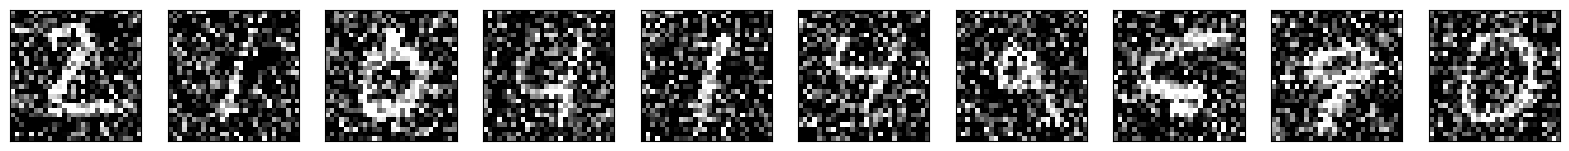

In [ ]:
import matplotlib.pyplot as plt

n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_img = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = keras.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
from keras.callbacks import TensorBoard

autoencoder.fit(x_train_noisy, x_train,
                epochs=100,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test_noisy, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/tb', histogram_freq=0, write_graph=False)])

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 265ms/step - loss: 0.2503 - val_loss: 0.1184
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 127s 270ms/step - loss: 0.1166 - val_loss: 0.1093
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 272ms/step - loss: 0.1094 - val_loss: 0.1054
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 132s 282ms/step - loss: 0.1056 - val_loss: 0.1030
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 128s 273ms/step - loss: 0.1036 - val_loss: 0.1015
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 145s 281ms/step - loss: 0.1022 - val_loss: 0.1004
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 279ms/step - loss: 0.1011 - val_loss: 0.0999
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 152s 301ms/step - loss: 0.1000 - val_loss: 0.0987
Epoch 9/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 138s 293ms/step - loss: 0.0994 - val_loss: 0.0982
Epoch 10/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 141s 292ms/step - loss: 0.0988 - val_loss: 0.0977
Epoch 11/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 133s 272ms/step - loss: 0.0980 - val_loss: 0.09

313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step


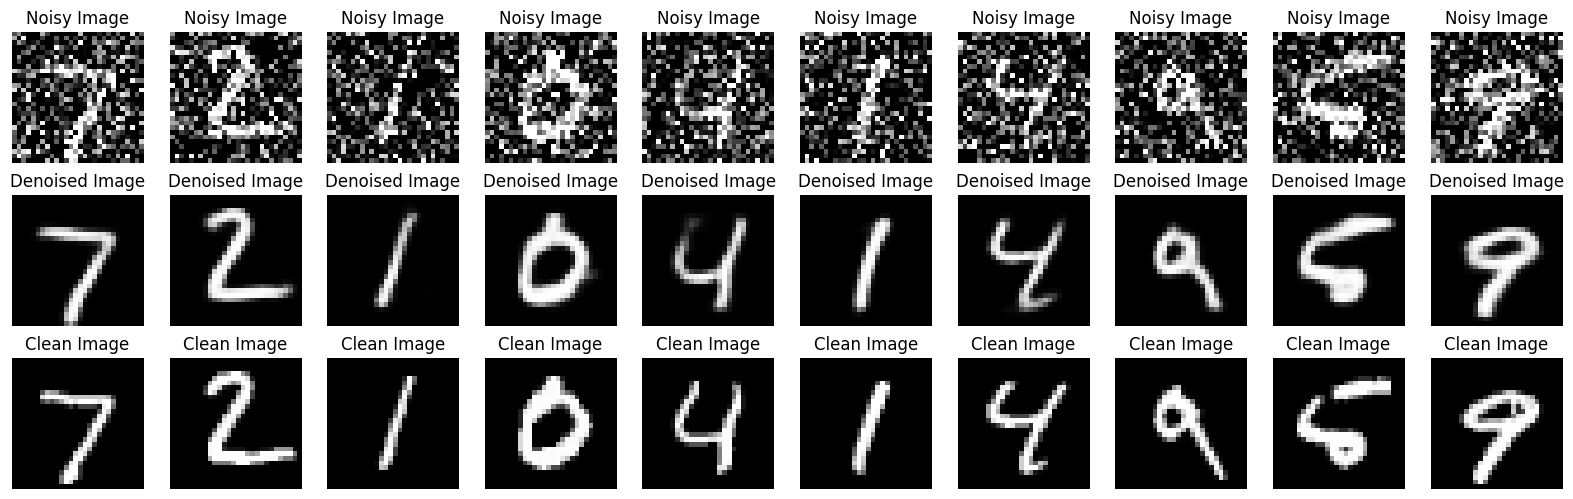

In [ ]:
denoised_images = autoencoder.predict(x_test_noisy)

def plot_images(noisy_images, denoised_images, clean_images, n=10):
    plt.figure(figsize=(20, 6))
    for i in range(n):
        plt.subplot(3, n, i + 1)
        plt.imshow(noisy_images[i].reshape(28, 28), cmap='gray')
        plt.title("Noisy Image")
        plt.axis('off')

        plt.subplot(3, n, i + 1 + n)
        plt.imshow(denoised_images[i].reshape(28, 28), cmap='gray')
        plt.title("Denoised Image")
        plt.axis('off')

        plt.subplot(3, n, i + 1 + 2 * n)
        plt.imshow(clean_images[i].reshape(28, 28), cmap='gray')
        plt.title("Clean Image")
        plt.axis('off')
    plt.show()

plot_images(x_test_noisy, denoised_images, x_test, n=10)